In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/content/breast-cancer.csv')

# Display the first few rows of the dataframe
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   
5  ...         15.47          23.75           103.40       741.6   
6  ...         22.88          27.66           153.20      1606.0   
7  ...         17.06          28.14           110.60       897.0   
8  ...         15.49          30.73           106.20       739.3   
9  ...         15.09          40.68            97.65       711.4   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  
5          0.3985                  0.12440  
6          0.3063                  0.08368  
7          0.3196                  0.11510  
8          0.4378                  0.10720  
9          0.4366                  0.20750  

[10 rows x 32 columns]

In [5]:
# Checking basic info, missing values, and duplicates
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")
df.info()
df.describe()

# Checking for null values and duplicates
df.isnull().sum()
df.duplicated().sum()

# Diagnosis column: converting 'M' (Malignant) and 'B' (Benign) to 1 and 0 respectively
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df.head(10)

There are 569 rows and 32 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float

<ipython-input-5-a0a7790a4837>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   
5    843786          1        12.45         15.70           82.57      477.1   
6    844359          1        18.25         19.98          119.60     1040.0   
7  84458202          1        13.71         20.83           90.20      577.9   
8    844981          1        13.00         21.82           87.50      519.8   
9  84501001          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   
5  ...         15.47          23.75           103.40       741.6   
6  ...         22.88          27.66           153.20      1606.0   
7  ...         17.06          28.14           110.60       897.0   
8  ...         15.49          30.73           106.20       739.3   
9  ...         15.09          40.68            97.65       711.4   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   
7            0.1654             0.3682           0.2678                0.1556   
8            0.1703             0.5401           0.5390                0.2060   
9            0.1853             1.0580           1.1050                0.2210   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  
5          0.3985                  0.12440  
6          0.3063                  0.08368  
7          0.3196                  0.11510  
8          0.4378                  0.10720  
9          0.4366                  0.20750  

[10 rows x 32 columns]

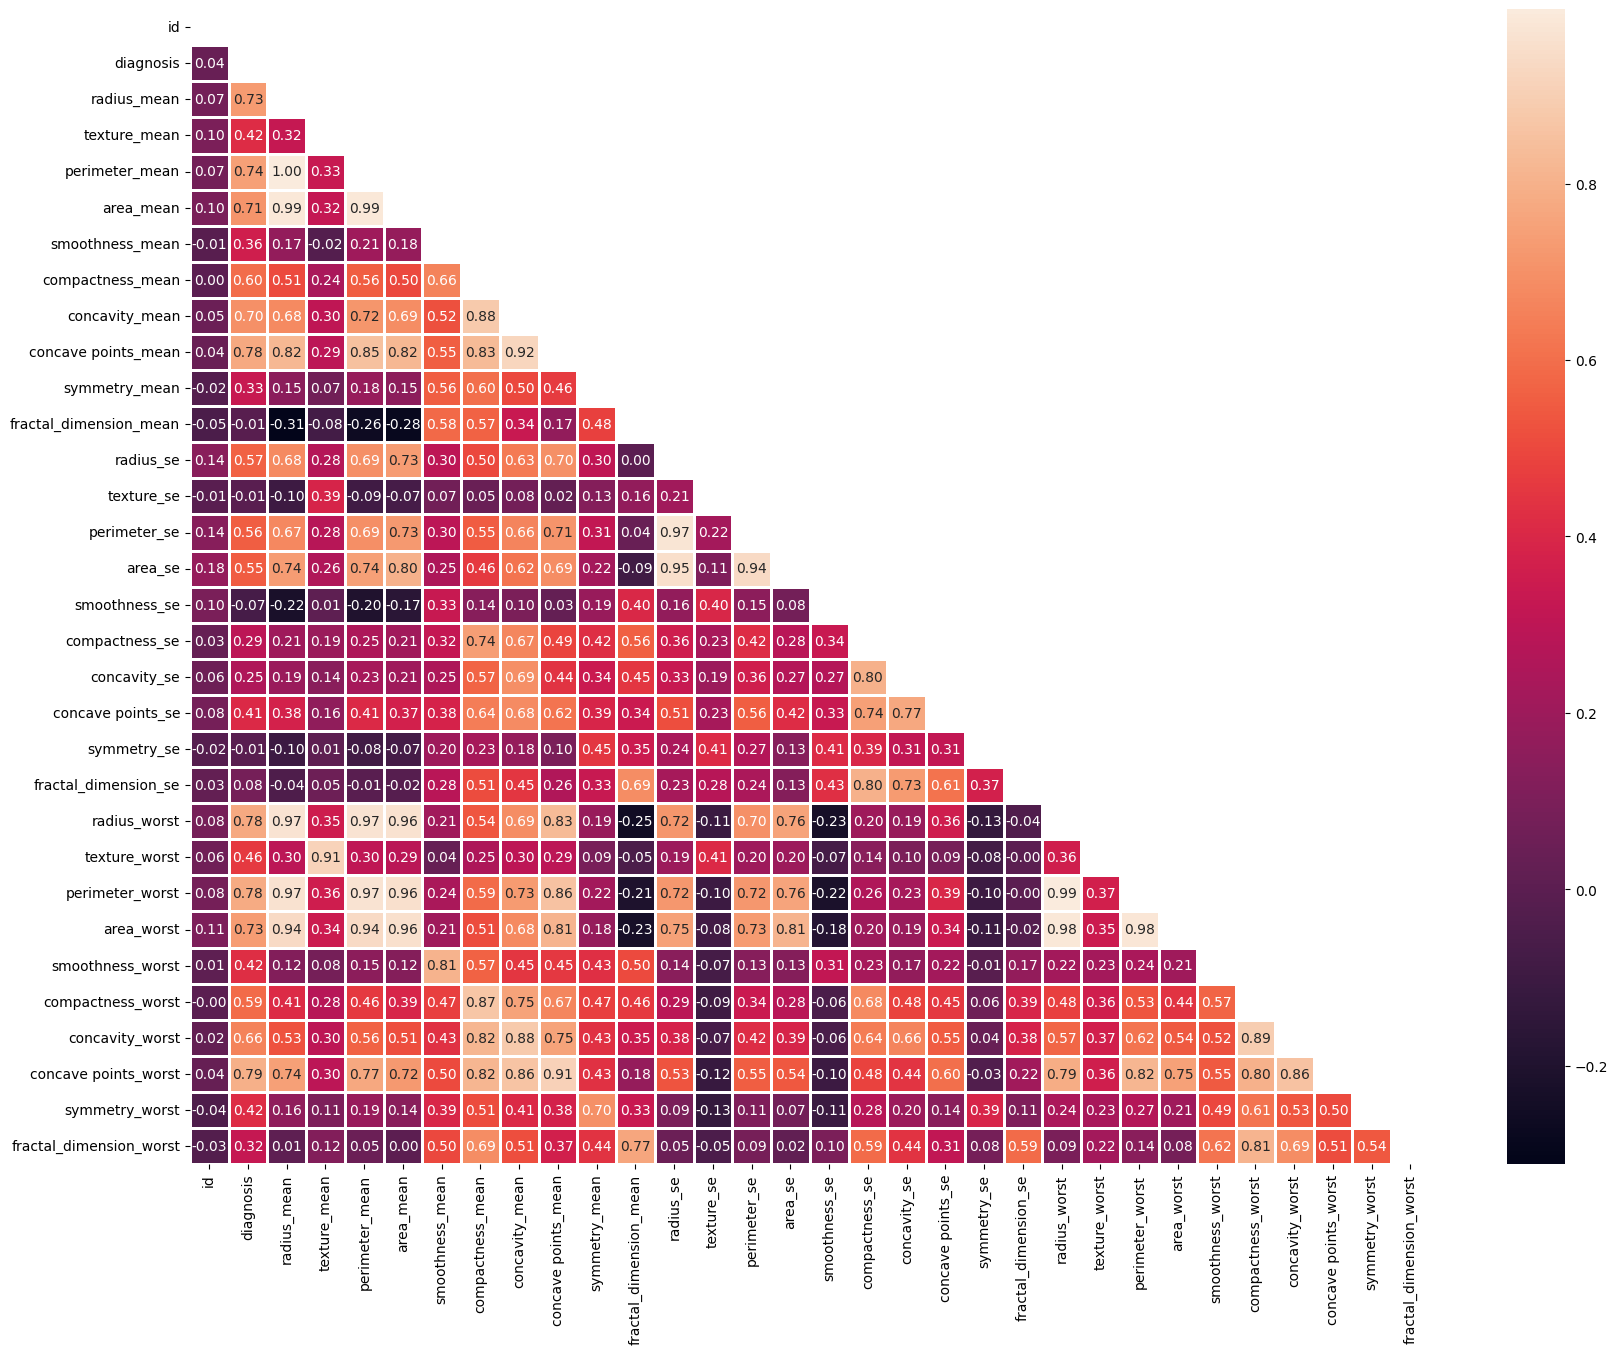

In [6]:
#Explotatory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(20,15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt='.2f')
plt.show()

In [ ]:
# Removing highly correlated features (threshold > 0.9)
corr_matrix = df.corr().abs()
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]
df = df.drop(to_drop, axis=1)

# Final shape after removing correlated features
print(f"The reduced dataframe has {df.shape[1]} columns.")
df.drop(columns=['id'], inplace=True)

The reduced dataframe has 22 columns.


In [ ]:
# Splitting data into features and target
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Standardizing the features
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)

# Splitting into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size=0.2, random_state=42
)

# Checking the shape of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 20), (114, 20), (455,), (114,))

In [ ]:
# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return acc, precision, recall, f1

# Store results for comparison
results = []

In [ ]:
# Logistic Regression with GridSearchCV
log_model = LogisticRegression(solver='liblinear', random_state=42)
log_param_grid = {'C': [0.01, 0.1, 1, 10]}
log_grid_search = GridSearchCV(log_model, log_param_grid, cv=5, scoring='accuracy')
log_grid_search.fit(x_train, y_train)
log_best_model = log_grid_search.best_estimator_

# Evaluate the Logistic Regression model
acc, precision, recall, f1 = evaluate_model(log_best_model, x_train, y_train, x_test, y_test)
results.append(['Logistic Regression', acc, precision, recall, f1])

In [ ]:
# Convert the results into a DataFrame for comparison
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the results
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.991228        1.0  0.976744  0.988235
